In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../Data_Cleaning/Data/gurgaon_properties_missing_values_impute.csv')

In [4]:
df.shape

(3675, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ss the leaf,sector 85,2.20,6934.0,4.0,5.0,3+,4.0,Relatively New,2547.0,0.0,0.0,0.0,0.0,0.0,1.0,106.0
1,flat,m3m sierra 68,sector 68,1.08,8675.0,2.0,2.0,3,1.0,Relatively New,1130.0,0.0,0.0,0.0,0.0,0.0,0.0,149.0
2,flat,ashiana anmol,sohna road,0.99,8216.0,2.0,2.0,2,6.0,Relatively New,1046.0,0.0,0.0,0.0,0.0,0.0,1.0,49.0
3,house,independent,sector 38,8.00,25616.0,10.0,10.0,3+,1.0,Relatively New,3123.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,flat,puri diplomatic greens,sector 111,3.70,12542.0,4.0,5.0,3+,12.0,Relatively New,2650.0,0.0,1.0,0.0,0.0,0.0,0.0,158.0


In [6]:
train_df = df.drop(columns=['society', 'price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 85,2.20,4.0,5.0,3+,4.0,Relatively New,2547.0,0.0,0.0,0.0,0.0,0.0,1.0,106.0
1,flat,sector 68,1.08,2.0,2.0,3,1.0,Relatively New,1130.0,0.0,0.0,0.0,0.0,0.0,0.0,149.0
2,flat,sohna road,0.99,2.0,2.0,2,6.0,Relatively New,1046.0,0.0,0.0,0.0,0.0,0.0,1.0,49.0
3,house,sector 38,8.00,10.0,10.0,3+,1.0,Relatively New,3123.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,flat,sector 111,3.70,4.0,5.0,3+,12.0,Relatively New,2650.0,0.0,1.0,0.0,0.0,0.0,0.0,158.0


C:\Users\amrit\AppData\Local\Temp\ipykernel_5060\663931128.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr())


<Axes: >

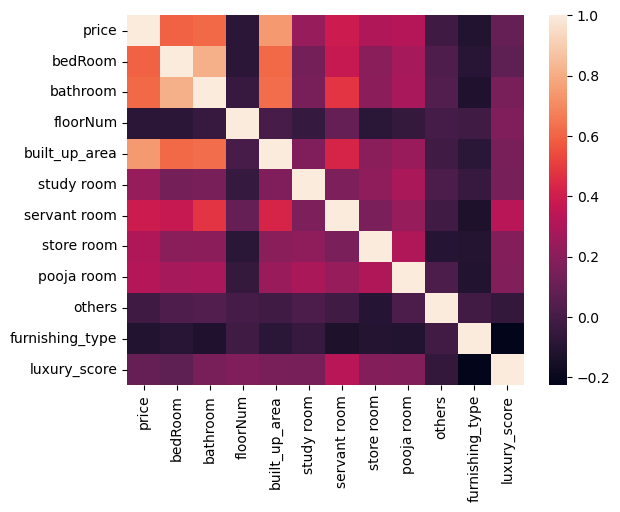

In [8]:
sns.heatmap(train_df.corr())

In [9]:
train_df.corr()['price'].sort_values(ascending=False)

C:\Users\amrit\AppData\Local\Temp\ipykernel_5060\897562334.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()['price'].sort_values(ascending=False)


price              1.000000
built_up_area      0.744501
bathroom           0.613338
bedRoom            0.593783
servant room       0.391823
pooja room         0.318387
store room         0.307517
study room         0.238768
luxury_score       0.096790
others            -0.023002
floorNum          -0.085094
furnishing_type   -0.111015
Name: price, dtype: float64

# Luxury Score

<Axes: xlabel='luxury_score'>

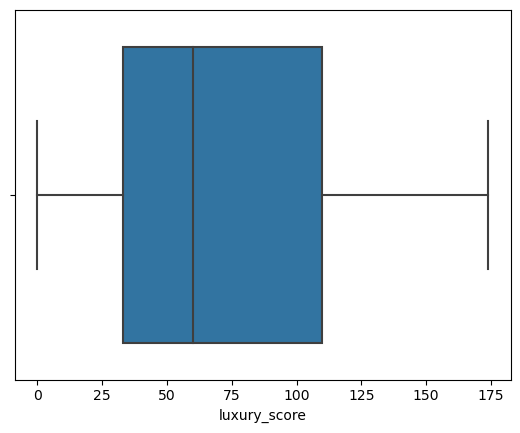

In [10]:
sns.boxplot(x=train_df['luxury_score'])

In [11]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "high"
    else:
        return None # Lables for values outside the defined bins

In [12]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [13]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 85,2.20,4.0,5.0,3+,4.0,Relatively New,2547.0,0.0,0.0,0.0,0.0,0.0,1.0,106.0,Medium
1,flat,sector 68,1.08,2.0,2.0,3,1.0,Relatively New,1130.0,0.0,0.0,0.0,0.0,0.0,0.0,149.0,Medium
2,flat,sohna road,0.99,2.0,2.0,2,6.0,Relatively New,1046.0,0.0,0.0,0.0,0.0,0.0,1.0,49.0,Low
3,house,sector 38,8.00,10.0,10.0,3+,1.0,Relatively New,3123.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Low
4,flat,sector 111,3.70,4.0,5.0,3+,12.0,Relatively New,2650.0,0.0,1.0,0.0,0.0,0.0,0.0,158.0,high


# floor Num

<Axes: xlabel='floorNum'>

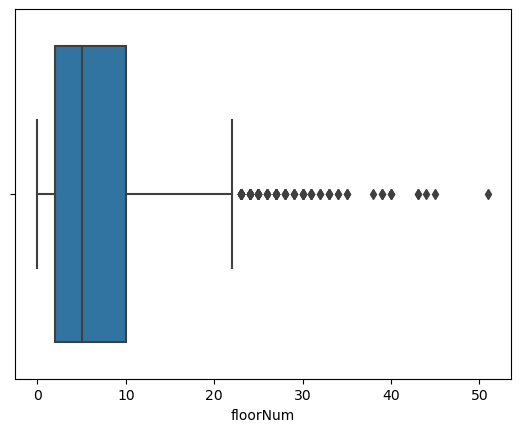

In [14]:
sns.boxplot(x=train_df['floorNum'])

In [15]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None # Lables for values outside the defined bins

In [16]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [17]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 85,2.20,4.0,5.0,3+,4.0,Relatively New,2547.0,0.0,0.0,0.0,0.0,0.0,1.0,106.0,Medium,Mid Floor
1,flat,sector 68,1.08,2.0,2.0,3,1.0,Relatively New,1130.0,0.0,0.0,0.0,0.0,0.0,0.0,149.0,Medium,Low Floor
2,flat,sohna road,0.99,2.0,2.0,2,6.0,Relatively New,1046.0,0.0,0.0,0.0,0.0,0.0,1.0,49.0,Low,Mid Floor
3,house,sector 38,8.00,10.0,10.0,3+,1.0,Relatively New,3123.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Low,Low Floor
4,flat,sector 111,3.70,4.0,5.0,3+,12.0,Relatively New,2650.0,0.0,1.0,0.0,0.0,0.0,0.0,158.0,high,High Floor


In [18]:
train_df.drop(columns=['floorNum', 'luxury_score'], inplace=True)

In [19]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 85,2.20,4.0,5.0,3+,Relatively New,2547.0,0.0,0.0,0.0,0.0,0.0,1.0,Medium,Mid Floor
1,flat,sector 68,1.08,2.0,2.0,3,Relatively New,1130.0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Low Floor
2,flat,sohna road,0.99,2.0,2.0,2,Relatively New,1046.0,0.0,0.0,0.0,0.0,0.0,1.0,Low,Mid Floor
3,house,sector 38,8.00,10.0,10.0,3+,Relatively New,3123.0,0.0,0.0,0.0,0.0,0.0,1.0,Low,Low Floor
4,flat,sector 111,3.70,4.0,5.0,3+,Relatively New,2650.0,0.0,1.0,0.0,0.0,0.0,0.0,high,High Floor


In [20]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply Label encoding to categorical columns

for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)
    
# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'sect

# Technique 1 - Correlation Analysis

<Axes: >

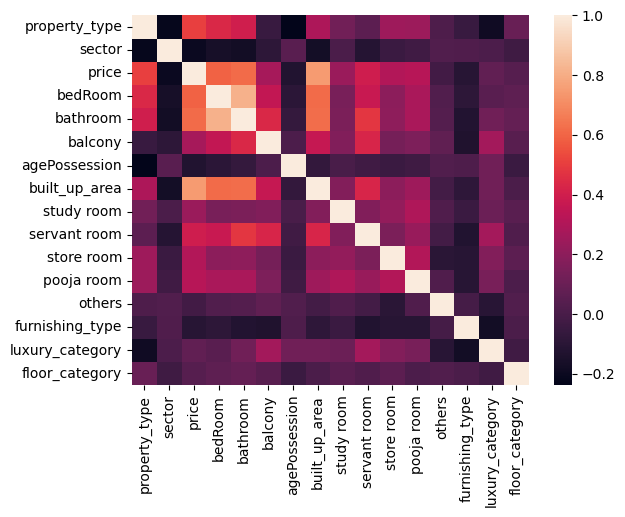

In [21]:
sns.heatmap(data_label_encoded.corr())

In [22]:
fi_df1 = data_label_encoded.corr()['price'].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,property_type,0.505717
1,sector,-0.202779
2,price,1.000000
3,bedRoom,0.593783
4,bathroom,0.613338
5,balcony,0.271199
6,agePossession,-0.130965
7,built_up_area,0.744501
8,study room,0.238768
9,servant room,0.391823


# Technique 2 - Random Forest Feature Importance

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor on Label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.641338
0,property_type,0.112175
1,sector,0.108682
3,bathroom,0.023432
2,bedRoom,0.021198
8,servant room,0.018883
5,agePossession,0.016915
4,balcony,0.012144
12,furnishing_type,0.010267
13,luxury_category,0.007942


# Technique 3 - Gradient Boosting Feature importance

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest Regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.679391
1,sector,0.106372
0,property_type,0.105547
3,bathroom,0.033201
2,bedRoom,0.030955
8,servant room,0.020504
9,store room,0.012646
5,agePossession,0.004733
12,furnishing_type,0.002286
4,balcony,0.002262


# Technique 4 - Permutation Importance

In [25]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a random forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.719568
0,property_type,0.193826
1,sector,0.158237
8,servant room,0.011955
2,bedRoom,0.011682
3,bathroom,0.005337
4,balcony,0.003563
5,agePossession,0.001852
11,others,0.000726
9,store room,0.000667


# Technique 5 - LASSO

In [26]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a Lasso Regression model
# We'll use a relatively small value for alpha for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficient
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.454930
0,property_type,0.696367
3,bathroom,0.287812
9,store room,0.203879
8,servant room,0.167087
7,study room,0.167011
10,pooja room,0.087599
2,bedRoom,0.015951
13,luxury_category,0.001832
14,floor_category,-0.007004


# Technique 6 - RFE

In [27]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.639876
0,property_type,0.112444
1,sector,0.102439
3,bathroom,0.025235
2,bedRoom,0.022566
8,servant room,0.018872
5,agePossession,0.016138
4,balcony,0.013683
9,store room,0.009983
12,furnishing_type,0.009725


# Technique 7 - Linear Regression Weights

In [28]:
# Train a linear regression model on the label-encoded and standardized training data

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.457322
0,property_type,0.695285
3,bathroom,0.294853
9,store room,0.207551
7,study room,0.175809
8,servant room,0.174067
10,pooja room,0.090097
2,bedRoom,0.019850
13,luxury_category,0.011746
14,floor_category,-0.017806


# Technique 8 - SHAP

In [29]:
import shap

# Compute SHAP values using the trained Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf, n_jobs=-1)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[-3.64751931e-01, -5.14652275e-01,  3.77325994e-02, ...,
        -2.17960642e-02, -8.36178980e-03, -6.73135204e-03],
       [-1.81047178e-01,  8.57857314e-02, -3.32619816e-02, ...,
        -4.61807325e-03,  2.23482751e-03, -1.11647150e-02],
       [-1.85809704e-01, -3.87061746e-01, -3.46731937e-02, ...,
        -9.78971098e-03,  1.65179876e-02, -9.11225741e-04],
       ...,
       [-1.91009240e-01, -4.13912016e-01, -3.78526041e-02, ...,
        -9.59144170e-03, -2.93965091e-03, -4.95436440e-03],
       [-3.41010379e-01,  9.63202636e-01,  8.42100406e-04, ...,
         5.01752526e-01,  5.12174766e-02,  2.13905243e-01],
       [-1.33817209e-01,  4.49325350e-01, -1.82241077e-03, ...,
        -9.40717957e-03,  8.30257035e-03, -9.21526910e-05]])

In [30]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.222552
0,property_type,0.478844
1,sector,0.382821
3,bathroom,0.106487
8,servant room,0.088305
2,bedRoom,0.047248
4,balcony,0.039953
5,agePossession,0.028224
12,furnishing_type,0.025637
14,floor_category,0.025017


In [31]:
final_fi_df = fi_df1

for i in range(1, 8):
    final_fi_df = final_fi_df.merge(globals()[f"fi_df{i+1}"], on='feature')

final_fi_df = final_fi_df.set_index('feature')

In [32]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
property_type,0.505717,0.112175,0.105547,0.193826,0.696367,0.112444,0.695285,0.478844
sector,-0.202779,0.108682,0.106372,0.158237,-0.051856,0.102439,-0.060522,0.382821
bedRoom,0.593783,0.021198,0.030955,0.011682,0.015951,0.022566,0.019850,0.047248
bathroom,0.613338,0.023432,0.033201,0.005337,0.287812,0.025235,0.294853,0.106487
balcony,0.271199,0.012144,0.002262,0.003563,-0.024739,0.013683,-0.048818,0.039953
agePossession,-0.130965,0.016915,0.004733,0.001852,-0.038182,0.016138,-0.047651,0.028224
built_up_area,0.744501,0.641338,0.679391,0.719568,1.454930,0.639876,1.457322,1.222552
study room,0.238768,0.006366,0.001392,-0.001195,0.167011,0.005787,0.175809,0.015965
servant room,0.391823,0.018883,0.020504,0.011955,0.167087,0.018872,0.174067,0.088305


In [33]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [34]:
final_fi_df[['rf_importance', 'gb_importance', 'permutation_importance', 'rfe_score', 'SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.620092
property_type      0.139340
sector             0.122700
bathroom           0.025817
servant room       0.020850
bedRoom            0.020825
agePossession      0.010139
balcony            0.009444
store room         0.007187
furnishing_type    0.006581
floor_category     0.004421
luxury_category    0.003973
study room         0.003762
pooja room         0.003060
others             0.001808
dtype: float64

In [35]:
# Drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,99.0,4.0,5.0,4.0,3.0,2547.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
1,0.0,79.0,2.0,2.0,3.0,3.0,1130.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,113.0,2.0,2.0,2.0,3.0,1046.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
3,1.0,47.0,10.0,10.0,4.0,3.0,3123.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,17.0,4.0,5.0,4.0,3.0,2650.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3670,0.0,56.0,3.0,3.0,3.0,2.0,1700.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3671,0.0,53.0,3.0,3.0,2.0,1.0,196.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3672,0.0,113.0,2.0,2.0,2.0,3.0,720.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
3673,0.0,63.0,3.0,4.0,3.0,3.0,2329.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0


In [36]:
# Perform evaluation with all cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [37]:
scores.mean()

0.8200130093167278

In [38]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [39]:
scores.mean()

0.825245667714432

In [40]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [41]:
# export_df.to_csv('../Data_Cleaning/Data/gurgaon_properties_post_feature_selection_v2.csv', index=False)